In [36]:
from cmdstanpy import CmdStanModel


import arviz as az
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
import pandas as pd

F = 7
L = 3
N = (L+F)*100

## Excercise 1

In [37]:
model = CmdStanModel(stan_file='code_1.stan')
data = {'N': N}
result = model.sample(data=data, chains=4)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▉         | 00:00 Iteration:   1 / 1000 [  0%]  (Sampling)


chain 1 |█▎        | 00:00 Iteration: 100 / 1000 [ 10%]  (Sampling)


chain 1 |█▊        | 00:00 Iteration: 200 / 1000 [ 20%]  (Sampling)


chain 1 |██▎       | 00:01 Iteration: 300 / 1000 [ 30%]  (Sampling)


chain 1 |██▋       | 00:01 Iteration: 400 / 1000 [ 40%]  (Sampling)


chain 1 |███▏      | 00:01 Iteration: 500 / 1000 [ 50%]  (Sampling)


chain 1 |███▋      | 00:01 Iteration: 600 / 1000 [ 60%]  (Sampling)


chain 1 |████      | 00:01 Iteration: 700 / 1000 [ 70%]  (Sampling)


chain 1 |████▌     | 00:02 Iteration: 800 / 1000 [ 80%]  (Sampling)


chain 1 |█████     | 00:02 Iteration: 900 / 1000 [ 90%]  (Sampling)


chain 1 |██████████| 00:02 Sampling completed                      
chain 2 |██████████| 00:02 Sampling completed                      
chain 3 |██████████| 00:02 Sampling


INFO:cmdstanpy:CmdStan done processing.


In [38]:
result.draws_pd()

,lp__,accept_stat__,theta,y[1],y[2],y[3],y[4],y[5],y[6],y[7],...,y[991],y[992],y[993],y[994],y[995],y[996],y[997],y[998],y[999],y[1000]
0,0.0,0.0,0.01,-1.807850,-0.230992,0.527615,1.823830,1.292800,-0.066464,-0.425514,...,-0.610484,-1.836330,-0.064375,0.099275,1.772270,9.277030,0.111347,-0.063274,-0.466656,0.163058
1,0.0,0.0,0.01,0.249274,1.284250,-0.312032,-0.417490,0.571514,-0.043884,-1.008170,...,-0.857087,-2.672360,-1.042320,-0.951936,-0.444473,23.073900,0.910564,-0.089411,-0.964650,0.834946
2,0.0,0.0,0.01,-0.909192,0.246392,0.235679,-1.064900,-0.867074,1.437680,-1.223130,...,0.037346,0.726579,1.640950,-1.265810,-0.169352,-0.780507,0.121939,0.192670,-2.049410,-0.906618
3,0.0,0.0,0.01,-1.854730,0.558574,-0.062153,-0.862047,1.110320,1.646850,0.309012,...,-0.187277,-0.143694,0.562547,-0.407258,0.024939,-0.043001,0.886142,0.570125,-1.407180,0.154356
4,0.0,0.0,0.01,-0.964659,1.364930,0.959410,0.216666,0.263762,-1.120740,0.239853,...,-0.057102,-1.614740,-0.788279,0.666672,1.035820,0.219189,0.889598,0.040363,-0.030196,1.301340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,0.0,0.0,0.01,0.745581,0.179011,-0.232912,-0.654089,1.199660,1.189900,0.624652,...,-0.292297,0.698218,-1.180210,-1.628620,-0.183052,1.789830,-0.451773,-0.922912,0.579298,-0.465588
3996,0.0,0.0,0.01,0.554560,-0.252946,-0.637368,-0.812080,-0.622490,1.561980,-0.307525,...,-2.163410,1.035190,-0.588325,-0.746049,-0.468793,1.176240,1.792300,-0.556150,-0.939187,-0.121924
3997,0.0,0.0,0.01,-1.689140,-0.671240,26.220700,0.445479,-1.239370,-0.544993,-2.213090,...,0.205520,1.194400,-0.249879,-0.226346,1.328230,-0.889754,1.322870,1.632400,0.396451,-0.437111
3998,0.0,0.0,0.01,0.037010,0.605337,0.124048,-0.149095,0.030832,0.582558,-2.194580,...,0.642275,-0.221170,-0.134271,-0.106331,1.065410,-0.513520,0.751708,1.571430,0.322234,-1.022820


In [39]:
y = result.stan_variable("y")
print(y)

[[-1.80785   -0.230992   0.527615  ... -0.0632742 -0.466656   0.163058 ]
 [ 0.249274   1.28425   -0.312032  ... -0.0894106 -0.96465    0.834946 ]
 [-0.909192   0.246392   0.235679  ...  0.19267   -2.04941   -0.906618 ]
 ...
 [-1.68914   -0.67124   26.2207    ...  1.6324     0.396451  -0.437111 ]
 [ 0.0370097  0.605337   0.124048  ...  1.57143    0.322234  -1.02282  ]
 [-0.803407   1.77524    1.0973    ... -0.33812   -1.32779    0.249183 ]]


In [40]:
model2 = CmdStanModel(stan_file='code_2.stan')
data = {'N': N}
result2 = model2.sample(data=data, chains=4)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▉         | 00:00 Iteration:   1 / 1000 [  0%]  (Sampling)




chain 1 |█▎        | 00:01 Iteration: 100 / 1000 [ 10%]  (Sampling)

chain 1 |█▊        | 00:02 Iteration: 200 / 1000 [ 20%]  (Sampling)


chain 1 |██▎       | 00:03 Iteration: 300 / 1000 [ 30%]  (Sampling)


chain 1 |██▋       | 00:04 Iteration: 400 / 1000 [ 40%]  (Sampling)


chain 1 |███▏      | 00:05 Iteration: 500 / 1000 [ 50%]  (Sampling)


chain 1 |███▋      | 00:06 Iteration: 600 / 1000 [ 60%]  (Sampling)


chain 1 |████      | 00:07 Iteration: 700 / 1000 [ 70%]  (Sampling)


chain 1 |████▌     | 00:08 Iteration: 800 / 1000 [ 80%]  (Sampling)


chain 1 |█████     | 00:09 Iteration: 900 / 1000 [ 90%]  (Sampling)

chain 1 |██████████| 00:09 Sampling completed                      
chain 2 |██████████| 00:09 Sampling completed                      

chain 3 |██████████| 00:09 Samplin


INFO:cmdstanpy:CmdStan done processing.


In [41]:
result2.draws_pd()

,lp__,accept_stat__,"X[1,1]","X[2,1]","X[3,1]","X[4,1]","X[5,1]","X[6,1]","X[7,1]","X[8,1]",...,y[991],y[992],y[993],y[994],y[995],y[996],y[997],y[998],y[999],y[1000]
0,0.0,0.0,-0.659827,-0.976430,-0.546931,0.727535,2.036410,-0.350116,-0.300544,-1.138250,...,-2.396480,0.667124,2.569550,-0.117579,-0.013911,-3.179640,-1.831450,0.575207,2.310250,0.269261
1,0.0,0.0,-0.060889,-0.060756,-1.933570,-0.054361,0.492765,0.460912,3.391790,0.806387,...,0.521856,-5.610030,0.533784,1.533380,1.224340,-1.589330,-0.108509,-0.798052,-2.826560,0.335538
2,0.0,0.0,-0.307195,1.070300,1.021880,-0.501333,-1.186060,-0.046984,0.448707,-0.679415,...,0.145690,0.692322,-4.292670,-0.119237,2.341700,-4.392520,-1.268350,0.393675,1.360870,-0.738269
3,0.0,0.0,0.670079,0.031036,1.263810,1.222960,1.856650,-0.218720,0.876507,-1.341150,...,0.560710,1.583010,-0.843697,2.860140,2.386650,0.005142,0.978457,-2.052690,-0.463260,-0.502200
4,0.0,0.0,-1.262560,-1.068040,0.999489,3.744160,0.962082,1.540990,0.821852,0.511643,...,0.786901,2.411120,2.511750,0.195904,-3.508160,2.066040,4.129710,3.538620,0.463113,2.813560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,0.0,0.0,1.491230,-0.197105,1.238110,-1.365090,0.945943,0.536767,-0.119524,0.140082,...,-1.820070,-5.859210,-3.898920,0.820978,1.410390,1.815700,-0.070843,0.658063,0.749537,2.286780
3996,0.0,0.0,-0.801284,-1.184870,0.093416,-0.110451,-0.344542,0.191886,-1.430590,0.406888,...,-2.110070,1.658860,-1.264810,-2.617010,-0.381720,-4.423450,4.708200,0.059144,0.327245,0.080241
3997,0.0,0.0,0.807157,0.153018,0.351916,0.508033,-1.044780,1.116250,-1.853230,1.037530,...,-1.312450,-1.431840,-0.941917,-0.485367,1.762140,0.525429,-1.495740,-2.217880,-1.525360,0.454402
3998,0.0,0.0,-1.707600,-0.161654,0.152738,0.593640,-0.151295,1.165880,0.315958,1.013750,...,0.893440,5.469870,-0.576873,2.770030,1.103180,-2.160360,1.258390,-1.787660,1.968570,0.330665


## Excercise 2

In [42]:
model3 = CmdStanModel(stan_file='code_3.stan')

data = {'N': N,
        'y': y[0]}
result3 = model3.sample(data=data, chains=4)

#Convertion to arviz InferenceData
arviz_result_3 = az.from_cmdstanpy(
    posterior=result3
)

arviz_result_3

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |███▋      | 00:00 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |███████▎  | 00:01 Iteration: 1300 / 2000 [ 65%]  (Sampling)


chain 1 |█████████ | 00:03 Iteration: 1700 / 2000 [ 85%]  (Sampling)
chain 1 |██████████| 00:04 Sampling completed                       
chain 2 |██████████| 00:04 Sampling completed                       
chain 3 |██████████| 00:04 Sampling completed                       
chain 4 |██████████| 00:04 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


Inference data with groups:
	> posterior
	> log_likelihood
	> sample_stats

In [43]:
model4 = CmdStanModel(stan_file='code_4.stan')
data = {'N': N,
        'y': y[0]}
result4 = model4.sample(data=data, chains=4)

arviz_result_4 = az.from_cmdstanpy(
    posterior=result4
)

arviz_result_4

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▍         | 00:00 Status


chain 1 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |████      | 00:00 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |█████▉    | 00:01 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▊   | 00:02 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |████████▏ | 00:03 Iteration: 1500 / 2000 [ 75%]  (Sampling)


chain 1 |████████▋ | 00:04 Iteration: 1600 / 2000 [ 80%]  (Sampling)


chain 1 |█████████ | 00:04 Iteration: 1700 / 2000 [ 85%]  (Sampling)


chain 1 |█████████▌| 00:05 Iteration: 1800 / 2000 [ 90%]  (Sampling)


chain 1 |██████████| 00:05 Iteration: 1900 / 2000 [ 95%]  (Sampling)


chain 1 |██████████| 00:06 Sampling completed                       
chain 2 |██████████| 00:06 Sampling completed                 


INFO:cmdstanpy:CmdStan done processing.


Inference data with groups:
	> posterior
	> log_likelihood
	> sample_stats

In [44]:
compare_dict = {"model_3": arviz_result_3, "model_4": arviz_result_4}
az_compare = az.compare(compare_dict)
az_compare

C:\Users\norbe\.conda\envs\myenv\lib\site-packages\arviz\stats\stats.py:694: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
C:\Users\norbe\.conda\envs\myenv\lib\site-packages\arviz\stats\stats.py:248: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ics = ics.append([ic_func(dataset, pointwise=True, scale=scale, var_name=var_name)])
C:\Users\norbe\.conda\envs\myenv\lib\site-packages\arviz\stats\stats.py:248: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ics = ics.append([ic_fun

,rank,loo,p_loo,d_loo,weight,se,dse,warning,loo_scale
model_4,0,-1512.567444,4.727862,0.000000,1.0,38.940740,0.000000,False,log
model_3,1,-2197.747990,46.952677,685.180546,0.0,170.873176,144.970617,True,log


<AxesSubplot:xlabel='Log'>

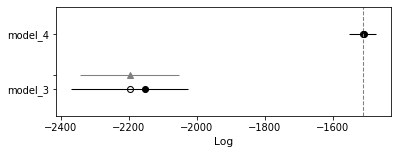

In [45]:
az.plot_compare(az_compare)

In [46]:
compare_dict = {"model_3": arviz_result_3, "model_4": arviz_result_4}
az_compare = az.compare(compare_dict, ic="waic")
az_compare

C:\Users\norbe\.conda\envs\myenv\lib\site-packages\arviz\stats\stats.py:1458: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(
C:\Users\norbe\.conda\envs\myenv\lib\site-packages\arviz\stats\stats.py:248: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ics = ics.append([ic_func(dataset, pointwise=True, scale=scale, var_name=var_name)])
C:\Users\norbe\.conda\envs\myenv\lib\site-packages\arviz\stats\stats.py:1458: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(
C:\Users\norbe\.conda\envs\myenv\lib\site-packages\arviz\stats\stats.py:248: FutureWarning: The frame.a

,rank,waic,p_waic,d_waic,weight,se,dse,warning,waic_scale
model_4,0,-1512.550680,4.711098,0.000000,1.0,38.935732,0.00000,True,log
model_3,1,-2201.764301,50.968987,689.213621,0.0,173.177333,147.34874,True,log


<AxesSubplot:xlabel='Log'>

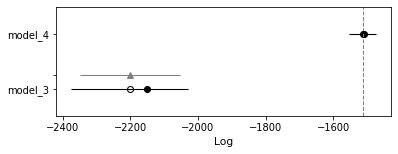

In [47]:
az.plot_compare(az_compare)

## Excercise 3

In [48]:
model_5 = CmdStanModel(stan_file='code_5.stan')
data = {"N": N, "y": result2.stan_variable("y")[0], "X": result2.stan_variable("X")[0][:, 0:1], "K": 1}
result5_1 = model_5.sample(data=data, chains=4)

arviz_result5_1 = az.from_cmdstanpy(
    posterior=result5_1
)

arviz_result5_1

INFO:cmdstanpy:compiling stan file C:\Users\norbe\Desktop\DataAnalytics\lab 7\code_5.stan to exe file C:\Users\norbe\Desktop\DataAnalytics\lab 7\code_5.exe
INFO:cmdstanpy:compiled model executable: C:\Users\norbe\Desktop\DataAnalytics\lab 7\code_5.exe
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |███▏      | 00:00 Iteration:  500 / 2000 [ 25%]  (Warmup)





chain 1 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |███████▎  | 00:02 Iteration: 1300 / 2000 [ 65%]  (Sampling)


chain 1 |████████▏ | 00:03 Iteration: 1500 / 2000 [ 75%]  (Sampling)


chain 1 |████████▋ | 00:04 Iteration: 1600 / 2000 [ 80%]  (Sampling)


chain 1 |█████████ | 00:04 Iteration: 1700 / 2000 [ 85%]  (Sampling)


chain 1 |█████████▌| 00:05 Iteration: 1800 / 2000 [ 90%]  (Sampling)


chain 1 |██████████| 00:06 Sampling completed                       
chain 2 |██████████| 00:06 Sampling 


INFO:cmdstanpy:CmdStan done processing.


Inference data with groups:
	> posterior
	> log_likelihood
	> sample_stats

In [49]:
data = {"N": N, "y": result2.stan_variable("y")[0], "X": result2.stan_variable("X")[0][:, 0:2], "K": 2}
result5_2 = model_5.sample(data=data, chains=4)

arviz_result5_2 = az.from_cmdstanpy(
    posterior=result5_2
)

arviz_result5_2

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)



chain 1 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)

chain 1 |██████▊   | 00:02 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |███████▋  | 00:03 Iteration: 1400 / 2000 [ 70%]  (Sampling)

chain 1 |████████▏ | 00:04 Iteration: 1500 / 2000 [ 75%]  (Sampling)


chain 1 |████████▋ | 00:04 Iteration: 1600 / 2000 [ 80%]  (Sampling)

chain 1 |█████████ | 00:05 Iteration: 1700 / 2000 [ 85%]  (Sampling)


chain 1 |█████████▌| 00:06 Iteration: 1800 / 2000 [ 90%]  (Sampling)

chain 1 |██████████| 00:06 Iteration: 1900 / 2000 [ 95%]  (Sampling)


chain 1 |██████████| 00:06 Sampling completed                       
chain 2 |██████████| 00:06 Sampling completed                       
chain 3 |██████████| 00:06 Sampling completed                       
chain 4 |█████


INFO:cmdstanpy:CmdStan done processing.


Inference data with groups:
	> posterior
	> log_likelihood
	> sample_stats

In [50]:
data = {"N": N, "y": result2.stan_variable("y")[0], "X": result2.stan_variable("X")[0][:, 0:3], "K": 3}
result5_3 = model_5.sample(data=data, chains=4)

arviz_result5_3 = az.from_cmdstanpy(
    posterior=result5_3
)

arviz_result5_3

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |█████     | 00:00 Iteration:  900 / 2000 [ 45%]  (Warmup)


chain 1 |██████▊   | 00:02 Iteration: 1200 / 2000 [ 60%]  (Sampling)




chain 1 |████████▏ | 00:04 Iteration: 1500 / 2000 [ 75%]  (Sampling)







chain 1 |█████████ | 00:05 Iteration: 1700 / 2000 [ 85%]  (Sampling)





chain 1 |██████████| 00:06 Sampling completed                       
chain 2 |██████████| 00:06 Sampling completed                       
chain 3 |██████████| 00:06 Sampling completed                       
chain 4 |██████████| 00:06 Sampling completed                       

INFO:cmdstanpy:CmdStan done processing.


Inference data with groups:
	> posterior
	> log_likelihood
	> sample_stats

In [51]:
compare_dict = {"model5_K_1": arviz_result5_1, "model5_K_2": arviz_result5_2, "model5_K_3": arviz_result5_3}
az_compare = az.compare(compare_dict)
az_compare

C:\Users\norbe\.conda\envs\myenv\lib\site-packages\arviz\stats\stats.py:248: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ics = ics.append([ic_func(dataset, pointwise=True, scale=scale, var_name=var_name)])
C:\Users\norbe\.conda\envs\myenv\lib\site-packages\arviz\stats\stats.py:248: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ics = ics.append([ic_func(dataset, pointwise=True, scale=scale, var_name=var_name)])
C:\Users\norbe\.conda\envs\myenv\lib\site-packages\arviz\stats\stats.py:248: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ics = ics.append([ic_func(dataset, pointwise=True, scale=scale, var_name=var_name)])


,rank,loo,p_loo,d_loo,weight,se,dse,warning,loo_scale
model5_K_3,0,-1434.526872,4.046439,0.000000,1.000000e+00,21.757631,0.000000,False,log
model5_K_2,1,-1539.549072,2.998491,105.022200,2.250933e-09,22.333702,13.897443,False,log
model5_K_1,2,-1848.620038,2.152323,414.093166,0.000000e+00,23.129370,23.578500,False,log


<AxesSubplot:xlabel='Log'>

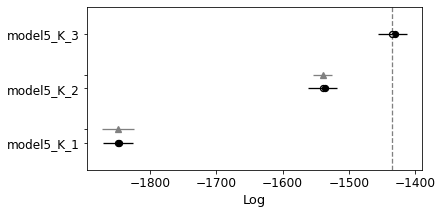

In [52]:
az.plot_compare(az_compare)

In [53]:
az_compare = az.compare(compare_dict, ic="waic")
az_compare

C:\Users\norbe\.conda\envs\myenv\lib\site-packages\arviz\stats\stats.py:248: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ics = ics.append([ic_func(dataset, pointwise=True, scale=scale, var_name=var_name)])
C:\Users\norbe\.conda\envs\myenv\lib\site-packages\arviz\stats\stats.py:248: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ics = ics.append([ic_func(dataset, pointwise=True, scale=scale, var_name=var_name)])
C:\Users\norbe\.conda\envs\myenv\lib\site-packages\arviz\stats\stats.py:248: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ics = ics.append([ic_func(dataset, pointwise=True, scale=scale, var_name=var_name)])


,rank,waic,p_waic,d_waic,weight,se,dse,warning,waic_scale
model5_K_3,0,-1434.526708,4.046275,0.000000,1.000000e+00,21.757632,0.000000,False,log
model5_K_2,1,-1539.548890,2.998310,105.022182,3.602328e-09,22.333686,13.897468,False,log
model5_K_1,2,-1848.619693,2.151979,414.092985,0.000000e+00,23.129330,23.578441,False,log


<AxesSubplot:xlabel='Log'>

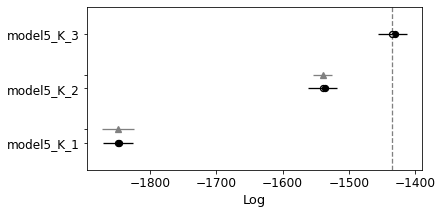

In [54]:
az.plot_compare(az_compare)

The best model was model with 3 predictors.